# Money Ball Linear Regression

### Developer: Donal Moloney
### Date: 7/29/20

## Purpose:
The purpose of this project is to create an implementation of linear regression from scratch. The implementation will then be used make predictions.
This algorithem model attempts to model variables by fitting them in a linear fashion. On average attmepting to get the lowest error possible. We can use this to predict unkown values.

Line of best fit can be represented by line Y = A + BX / Y = mx + b where b is the intercept and m is the slope.

### Approximation:
##### The equation can be approximated with y = mx + b. THis is the line equation where m is the slope and b is the bias / shift.

### Mean Squared Error:


### Gradient & Gradient Descent:


### Learning Rate:


In [67]:
# Imports

In [68]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Linear Regression Code

In [70]:
# Analysis

In [71]:
df = pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [72]:
df['RD'] = df['RS'] - df['RA']

In [73]:
df = df[df.Year < 2002]

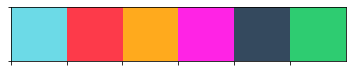

In [74]:
flatui = ["#6cdae7", "#fd3a4a", "#ffaa1d", "#ff23e5", "#34495e", "#2ecc71"]
sb.set_palette(flatui)
sb.palplot(sb.color_palette())

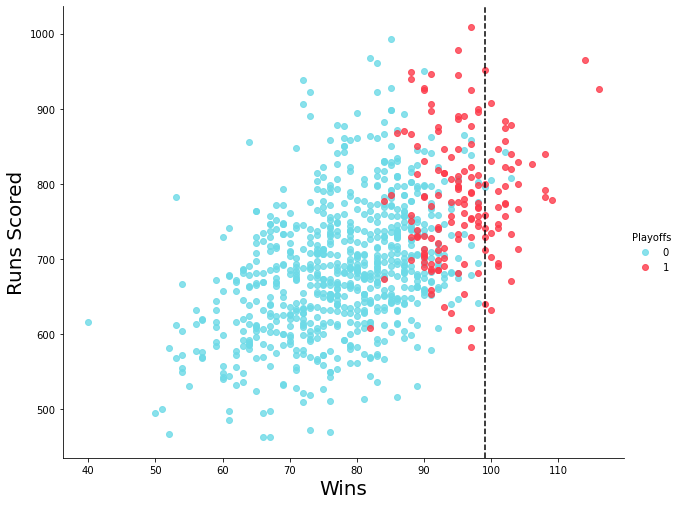

In [75]:
sb.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=df,height=7, aspect=1.25)
plt.xlabel("Wins", fontsize = 20)
plt.ylabel("Runs Scored", fontsize = 20)
plt.axvline(99, 0, 1, color = "Black", ls = '--')
plt.show()

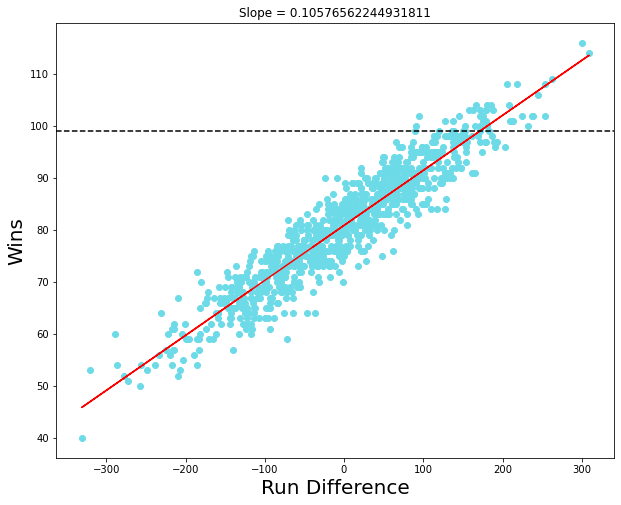

In [76]:
x = np.array(df.RD)
y = np.array(df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'r')
plt.title("Slope = %s" % (slope), fontsize = 12)
plt.xlabel("Run Difference", fontsize =20)
plt.ylabel("Wins", fontsize = 20)
plt.axhline(99, 0, 1, color = "k", ls = '--')
plt.show()

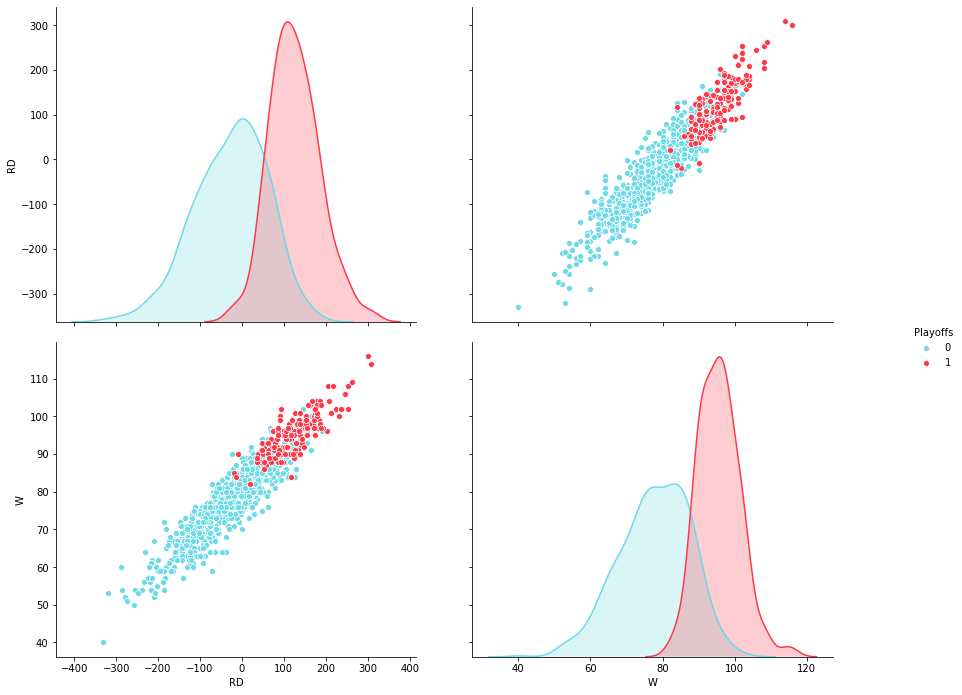

In [78]:
corrcheck = df[['RD', 'W', 'Playoffs']].copy()
g = sb.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])
g.fig.set_size_inches(14,10)

In [81]:
corrcheck.corr(method='pearson')

,RD,W,Playoffs
RD,1.000000,0.938515,0.566274
W,0.938515,1.000000,0.588978
Playoffs,0.566274,0.588978,1.000000


In [82]:
podesta = df[['OBP','SLG','BA','RS']]
podesta.corr(method='pearson')

,OBP,SLG,BA,RS
OBP,1.000000,0.806154,0.854055,0.904909
SLG,0.806154,1.000000,0.814068,0.926384
BA,0.854055,0.814068,1.000000,0.831625
RS,0.904909,0.926384,0.831625,1.000000
